In [11]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn as sk
from sklearn.metrics import mean_squared_error as MSE

from os import listdir, getcwd, chdir, makedirs
from os.path import isfile, join
import os

import IPython.display as display

from time import time

sns.set_style("darkgrid")

In [52]:
import tensorly as tl
tl.set_backend('numpy')

from tensorly.decomposition import parafac

import pyts
from pyts.decomposition import SingularSpectrumAnalysis

Сгенерируем простые данные для теста

In [134]:
point_step = 1
point_count = 100
experiment_count = 10

def func(t, scale=point_step):
    return np.sin(np.pi * t * scale) + np.sin(np.e * t * scale)

def generate_data(scale=point_step):
    t = np.arange(0, point_count * point_step, point_step)
    y = func(t, scale=scale)
    return t, y

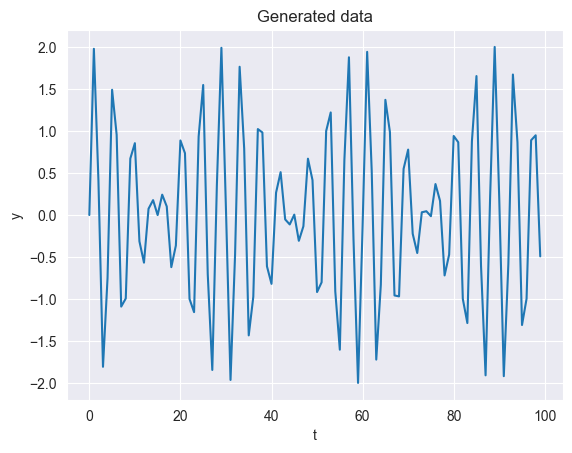

In [136]:
t, y = generate_data(scale = point_step / 2)

plt.plot(t, y)
plt.title("Generated data")
plt.xlabel("t")
plt.ylabel("y")
plt.show()

Применим SSA 

In [143]:
window_size = 5
groups = [i for i in range(window_size)]

# Singular Spectrum Analysis
ssa = SingularSpectrumAnalysis(window_size=window_size, groups=None)
t_ssa = ssa.fit_transform(y.reshape(1, -1))

window_take = 5

Посмотрим на компоненты, полученные из SSA

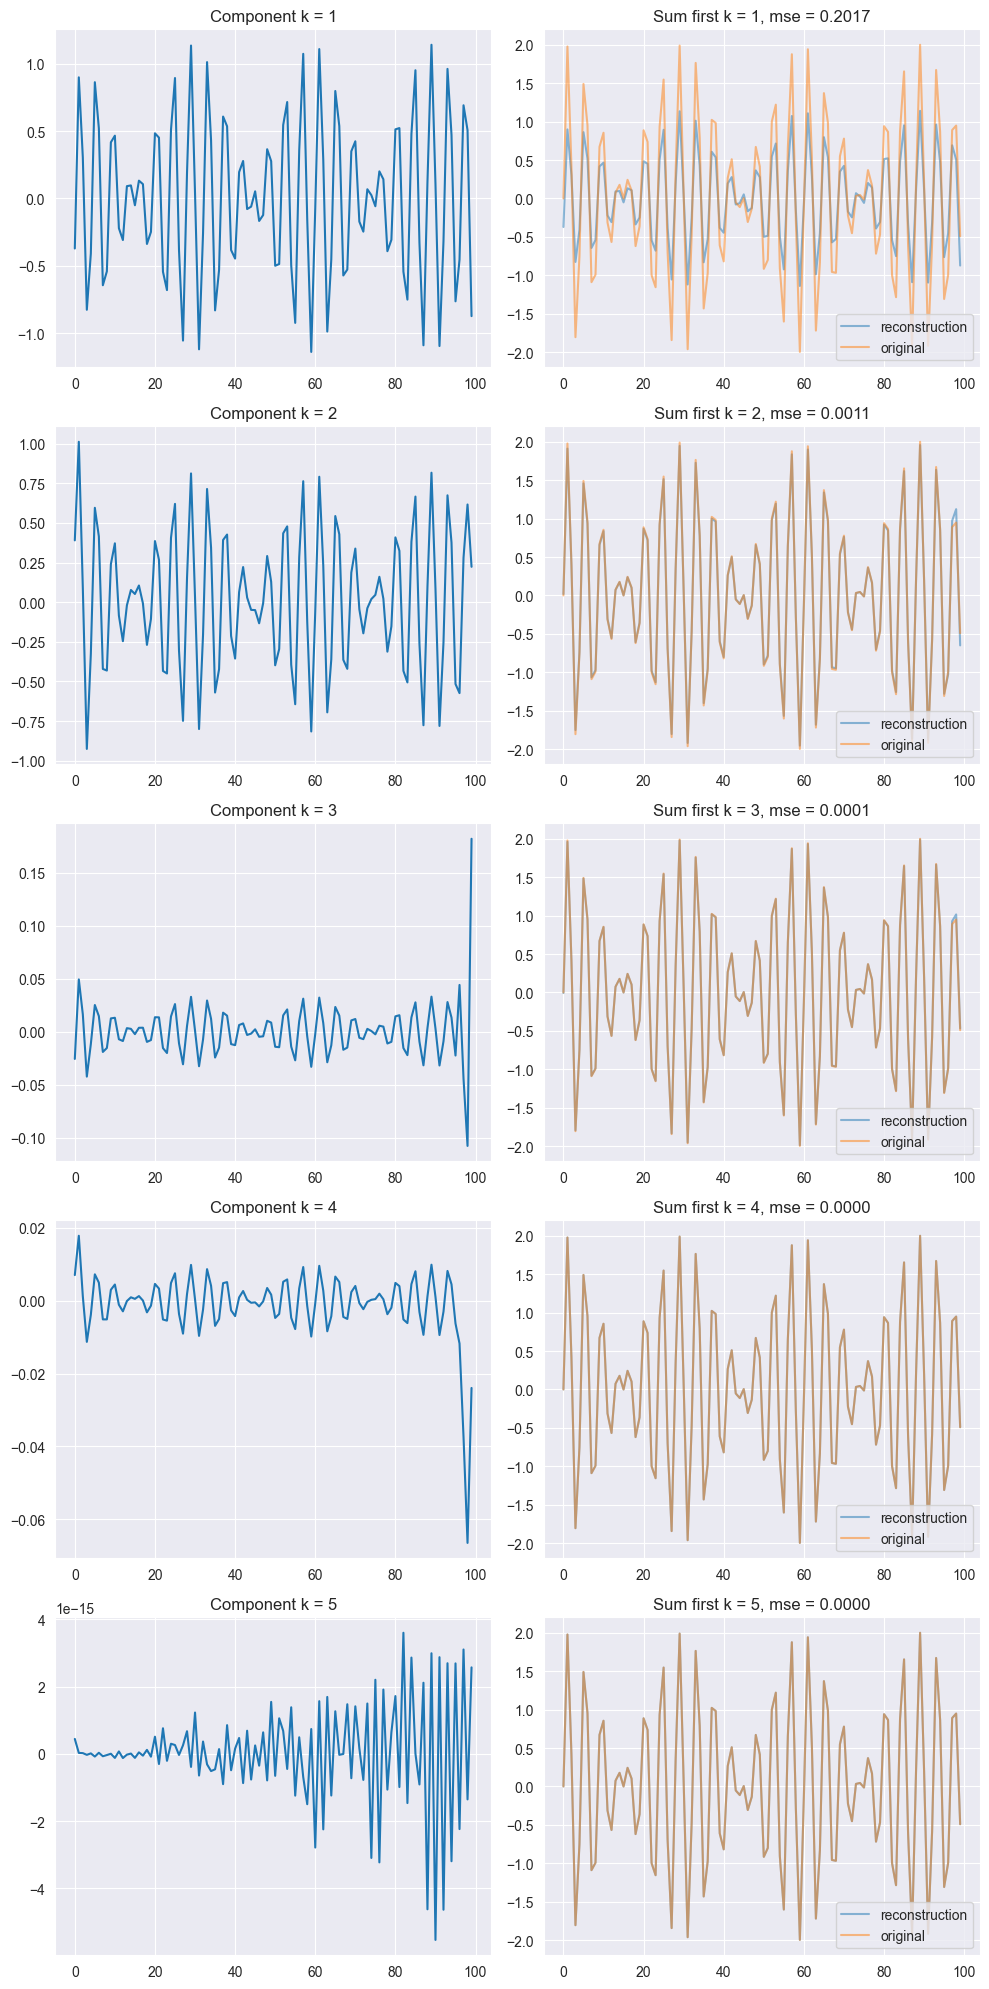

In [144]:
mses = []

fig = plt.figure(figsize=(10, window_size * 4))
for k in range(0, window_take):
    plt.subplot(window_size, 2, 2 * k + 1)

    kth_component = t_ssa[k]
    plt.plot(t, kth_component, label=f'k = {k+1}')
    plt.title(f'Component k = {k+1}')

# ============================================================s

    plt.subplot(window_size, 2, 2 * k + 2)

    first_k_sum = np.sum(t_ssa[:k+1], axis=0)
    plt.plot(t, first_k_sum, label=f'reconstruction', alpha=0.5)
    plt.plot(t, y, label='original', alpha=0.5)
    plt.legend()

    mse = MSE(y, first_k_sum)
    mses.append(mse)

    plt.title(f'Sum first k = {k+1}, mse = {mse:.4f}')


plt.tight_layout()
plt.show()

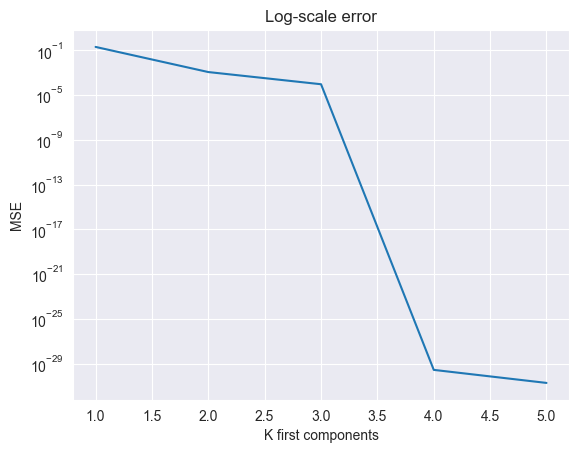

In [145]:
plt.plot(range(1, window_take + 1), mses)
plt.yscale('log')
plt.xlabel('K first components')
plt.ylabel('MSE')
plt.title('Log-scale error')
plt.show()

Для такой простой функции SSA уже справляется очень хорошо. Для нормального сравнения с TSSA нужны будут более сложные ряды